# Assignment-1
### DECISION TREES
Submitted by- Souparna Das, 2018201010

source of the dataset : http://researchweb.iiit.ac.in/~murtuza.bohra/decision_Tree.zip

1. Part-1: (30 points) Train decision tree only on categorical data. Report precision, recall, f1 score and accuracy.
2. Part-2: (30 points) Train the decision tree with categorical and numerical features. Report precision, recall, f1 score and accuracy.
3. Part-3: (10 points) Contrast the eﬀectiveness of Misclassiﬁcation rate, Gini, Entropy as impurity measures in terms of precision, recall and accuracy.
4. Part-4: (10 points) Visualise training data on a 2-dimensional plot taking one feature (attribute) on one axis and other feature on another axis. Take two suitable features to visualise decision tree boundary (Hint: use scatter plot with diﬀerent colors for each label).
5. Part-5: (10 points) Plot a graph of training and validation error with respect to depth of your decision tree. Also plot the training and validation error with respect to number of nodes in the decision tree. 
6. Part-6: (10 points) Explain how decision tree is suitable handle missing values(few attributes missing in test samples) in data

#### Analysis the dataset

In [1]:
#loading the train dataset into a pandas dataframe and viewing first 5 rows

import pandas as pd
total_train = pd.read_csv("train.csv")
print("* dataframe head: ")
total_train.head()

* dataframe head: 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.10,0.90,7,286,4,0,1,0,sales,low
1,0.89,0.93,4,249,3,0,0,0,sales,low
2,0.38,0.50,2,132,3,0,1,0,accounting,low
3,0.95,0.71,4,151,4,0,0,0,sales,medium
4,0.84,0.84,5,163,3,0,0,0,technical,low


Given this dataset we need to predict whether an employee will leave the company or not.

so this is a two class classification problem.
As per the assignment we need a Decision tree classifier to solve the problem

In [2]:
#there are 9 features and the label is "left"
#if the value at "left" is 1 that indicates that this particular employee have left

#lets see how balance the dataset is
print("number of rows and column in the dataset is: ",total_train.shape)


number of rows and column in the dataset is:  (11238, 10)


In [3]:
total_train["left"].value_counts()


0    8563
1    2675
Name: left, dtype: int64

As we can see the dataset is imbalanced
...
There are 2675 employees marked as left, and 8563 employees have not left

In [4]:
#We need to see which of the features are categorical.
#sales and salary is categorical
#lets check work_accident and promotion_in_5 years is categorical or not

print("Unique values in Work_Accident:\n",total_train["Work_accident"].value_counts())
print("Unique values in promotion:\n",total_train["promotion_last_5years"].value_counts())

Unique values in Work_Accident:
 0    9601
1    1637
Name: Work_accident, dtype: int64
Unique values in promotion:
 0    11003
1      235
Name: promotion_last_5years, dtype: int64


As we can see that Work_accident and promotion_last_5years are both categorical features

In [5]:
X=total_train.loc[:,total_train.columns != "left"] #X is the dataset after removing the label
Y = total_train["left"]                            #Y contains the training labels

In [6]:
X["sales"].value_counts()
#check how many categories does the feature "sales" has

sales          3151
technical      2001
support        1679
IT              926
product_mng     682
marketing       625
accounting      583
RandD           577
hr              540
management      474
Name: sales, dtype: int64

In [7]:
X["salary"].value_counts()
#check how many categories does the feature "salary" has

low       5487
medium    4804
high       947
Name: salary, dtype: int64

We need to encode these categorical features in numerical form to fit into our scikit learn model

In [8]:
salary_column = X["salary"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
salary_column=le.fit_transform(salary_column)

In [9]:
X=X.assign(salary=salary_column)

Now we need to encode another categorical feature "sales"

In [10]:
sales_column = X["sales"]
sales_column = le.fit_transform(sales_column)

In [11]:
X=X.assign(sales=sales_column)

In [12]:
X.head(7)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.10,0.90,7,286,4,0,0,7,1
1,0.89,0.93,4,249,3,0,0,7,1
2,0.38,0.50,2,132,3,0,0,2,1
3,0.95,0.71,4,151,4,0,0,7,2
4,0.84,0.84,5,163,3,0,0,9,1
5,0.76,0.94,4,168,6,0,0,9,2
6,0.55,0.88,4,252,3,0,0,4,1


In [13]:
X.shape

(11238, 9)

In [14]:
#split the data into train and cross validation

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print("train size is (rows,columns): ",X_train.shape)
print("test size is (rows, columns): ",X_test.shape)

#X_train contains the training data and Y_train contains the training label

train size is (rows,columns):  (8990, 9)
test size is (rows, columns):  (2248, 9)


### testing with the scikit learn decision tree

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
model=model.fit(X_train,Y_train)

In [16]:
import pydotplus
import collections

In [17]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model,
                                feature_names=list(X_train),
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

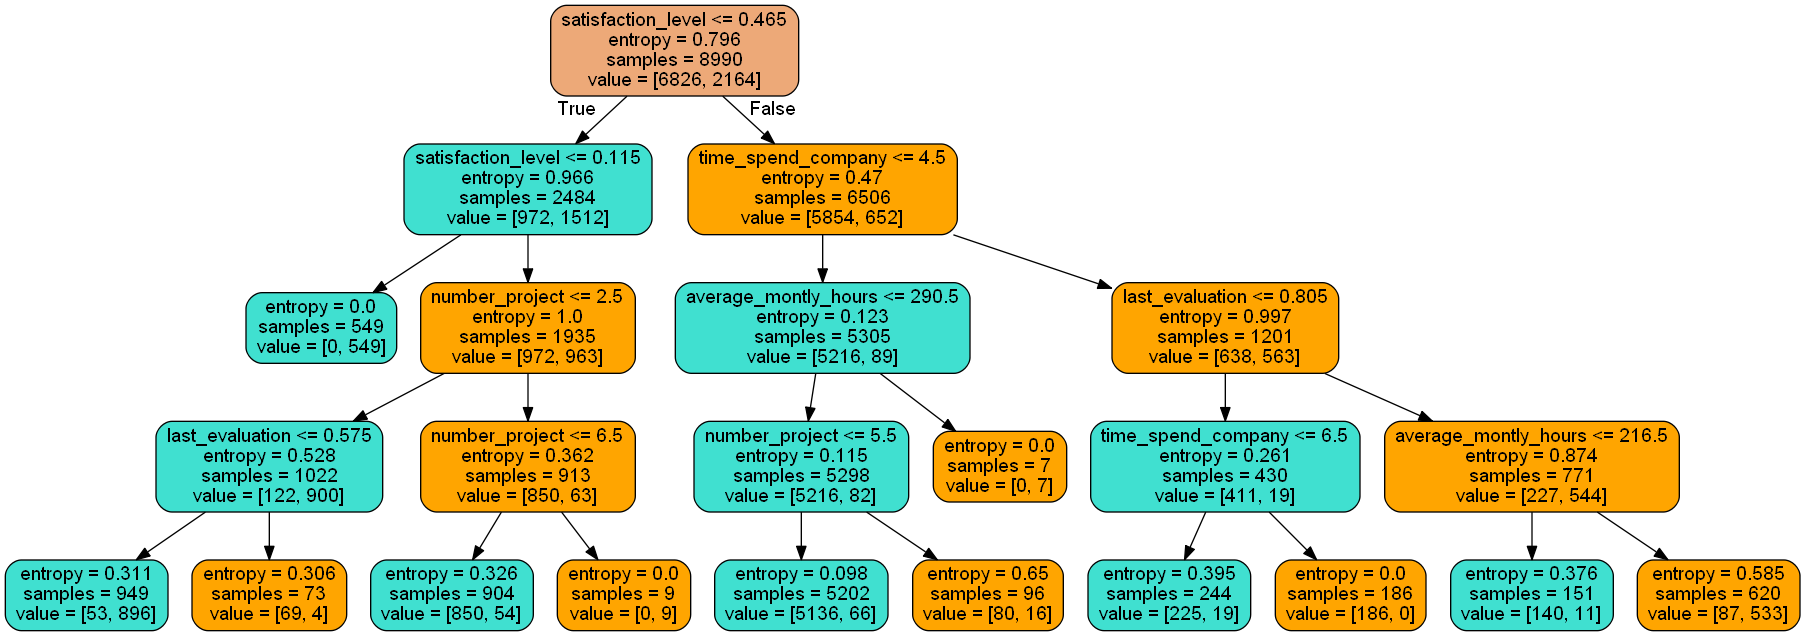

In [18]:
#prediction by the model on test data
Y_pred=model.predict(X_test)

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1744
          1       0.94      0.92      0.93       504

avg / total       0.97      0.97      0.97      2248



In [20]:
print("confusion matrix: \n",metrics.confusion_matrix(Y_test,Y_pred))

confusion matrix: 
 [[1715   29]
 [  38  466]]


# Question-1

### BUILDING OWN DECISION TREE FROM SCRATCH

In [21]:
import numpy as np
from numpy import log2 as log
eps = np.finfo(float).eps

def find_gini(Y_train):
    gini_node=0
    values = Y_train.unique()
    for value in values:
        prob= Y_train.value_counts()[value]/len(Y_train)
        gini_node+= prob*prob
    return 1-gini_node

def find_gini_attr(X_train,attribute):
    target_variables = X_train["outcome"].unique()
    variables = X_train[attribute].unique()
    variables.sort()
    length = list(variables.shape)
    min_threshold = -1
    gini_attribute = float('inf')
    if length[0]==1:
        return find_gini(X_train["outcome"]),min_threshold
    for i in range(0,length[0]-1):
        threshold = (variables[i]+variables[i+1])/2
        prob_left,prob_right=0,0
        for target_variable in target_variables:
            num_left = len(X_train[attribute][X_train[attribute]<threshold][X_train.outcome ==target_variable]) #numerator
            den_left = len(X_train[attribute][X_train[attribute]<threshold])  #denominator
            num_right= len(X_train[attribute][X_train[attribute]>=threshold][X_train.outcome ==target_variable])
            den_right= len(X_train[attribute][X_train[attribute]>=threshold])
            prob_left += (num_left/(den_left+eps))**2
            prob_right += (num_right/(den_right+eps))**2
        weight_left = den_left/(len(X_train))
        weight_right = den_right/(len(X_train))
        if gini_attribute > (weight_left * (1-prob_left) + weight_right*(1-prob_right)):
            gini_attribute = (weight_left * (1-prob_left) + weight_right*(1-prob_right))
            min_threshold = threshold
    return gini_attribute,min_threshold
       


def find_entropy(Y_train):
    entropy_node = 0
    values = Y_train.unique()
    for value in values:
        frac = Y_train.value_counts()[value]/len(Y_train)
        entropy_node+= -frac*log(frac)
    return entropy_node

def find_mis_rate(Y_train):
    misclass_node = 0
    values=Y_train.unique()
    for value in values:
        prob = Y_train.value_counts()[value]/len(Y_train)
        if misclass_node < prob:
            misclass_node =prob
    return (1-misclass_node)

def find_misclass_attr(X_train,attribute):
    target_variables = X_train["outcome"].unique()
    variables = X_train[attribute].unique()
    variables.sort()
    
    misclass_attribute=float('inf')
    length=list(variables.shape)
    min_threshold=-1
    if(length[0]==1):
        return find_mis_rate(X_train["outcome"]),min_threshold   
    for variable in range(0,length[0]-1):
        threshold = (variables[variable]+variables[variable+1])/2
        fraction_left,fraction_right=0,0
        for target_variable in target_variables:
            num_left = len(X_train[attribute][X_train[attribute]<threshold][X_train.outcome ==target_variable]) #numerator
            den_left = len(X_train[attribute][X_train[attribute]<threshold])  #denominator
            num_right= len(X_train[attribute][X_train[attribute]>=threshold][X_train.outcome ==target_variable])
            den_right= len(X_train[attribute][X_train[attribute]>=threshold])
            if fraction_left < float(num_left)/(den_left+eps):
                fraction_left = float(num_left)/(den_left+eps)
            if fraction_right < float(num_right)/(den_right+eps):
                fraction_right = float(num_right)/(den_right+eps)
        fraction2_left = float(den_left)/len(X_train)
        fraction2_right = float(den_right)/len(X_train)
        if misclass_attribute > fraction2_left*(1-fraction_left) + fraction2_right*(1-fraction_right):
            misclass_attribute = fraction2_left*(1-fraction_left) + fraction2_right*(1-fraction_right)
            min_threshold=threshold
    return misclass_attribute,min_threshold
    
def find_entropy_attr(X_train,attribute):
    target_variables = X_train["outcome"].unique()
    variables = X_train[attribute].unique()
    variables.sort()
    entropy_attribute=1
    length=list(variables.shape)
    min_threshold=-1
    if(length[0]==1):
        return find_entropy(X_train["outcome"]),min_threshold
        
    for variable in range(0,length[0]-1):
        threshold=(variables[variable]+variables[variable+1])/2
        entropy_each_feature_left=0
        entropy_each_feature_right=0
        for target_variable in target_variables:
            num_left = len(X_train[attribute][X_train[attribute]<threshold][X_train.outcome ==target_variable]) #numerator
            den_left = len(X_train[attribute][X_train[attribute]<threshold])  #denominator
            num_right= len(X_train[attribute][X_train[attribute]>=threshold][X_train.outcome ==target_variable])
            den_right= len(X_train[attribute][X_train[attribute]>=threshold])
            fraction_left = float(num_left)/(den_left+eps)  #pi
            entropy_each_feature_left += -(fraction_left+eps)*log(fraction_left+eps)
            fraction_right=float(num_right)/(den_right+eps)
            entropy_each_feature_right += -(fraction_right+eps)*log(fraction_right+eps)
        fraction2_left=float(den_left)/len(X_train)
        fraction2_right=float(den_right)/len(X_train)
        if entropy_attribute > (fraction2_left*entropy_each_feature_left + fraction2_right*entropy_each_feature_right):
            entropy_attribute=fraction2_left*entropy_each_feature_left + fraction2_right*entropy_each_feature_right
            min_threshold=threshold
    return entropy_attribute,min_threshold


def findWinner(X_train,criterion):
    if criterion=="entropy":
        IG=[]
        TH=[]
        for key in X_train.keys()[:-1]:
            min_weighted_entropy,threshold=find_entropy_attr(X_train,key)
            IG.append(find_entropy(X_train["outcome"])-min_weighted_entropy)
            TH.append(threshold)
        return X_train.keys()[:-1][np.argmax(IG)],TH[:][np.argmax(IG)],max(IG)
    if criterion=="misclassification_rate":
        MR=[]
        TH=[]
        for key in X_train.keys()[:-1]:
            mr,th=find_misclass_attr(X_train,key)
            MR.append(mr)
            TH.append(th)
        return X_train.keys()[:-1][np.argmin(MR)],TH[np.argmin(MR)],min(MR)
    if criterion == "gini":
        GI=[]
        TH=[]
        for key in X_train.keys()[:-1]:
            gi,th=find_gini_attr(X_train,key)
            GI.append(gi)
            TH.append(th)
        return X_train.keys()[:-1][np.argmin(GI)],TH[np.argmin(GI)],min(GI)

def get_subtable(X_train, node,th,side):
    if side==0:
        return X_train[X_train[node] < th].reset_index(drop=True)
    elif side==1:
        return X_train[X_train[node] >= th].reset_index(drop=True)
    else:
        return X_train[X_train[node] == th].reset_index(drop=True)  #not needed in this algo

        

def build_DT(X_train ,max_depth,min_Sample,criterion,depth,tree=None):
    node,th,ig = findWinner(X_train,criterion)
#     print("winner:", node,th)
    attValue = np.unique(X_train[node])
    if tree is None:                    
        tree={}
        tree[node] = {}
    if th==-1:
            zeros=X_train["outcome"].value_counts()[0]
            ones=X_train["outcome"].value_counts()[1]
            if zeros > ones:
                tree[node][(-float('inf'),float('inf'))]=0
            else:
                tree[node][(-float('inf'),float('inf'))]=1
            return tree
    


    subtable = get_subtable(X_train,node,th,0)
    clValue,counts = np.unique(subtable['outcome'],return_counts=True)
    X=subtable["outcome"].value_counts()
    if depth >= max_depth:                              #checking the depth
        tree[node][(-float('inf'),th)]=X.idxmax()
    elif len(counts)==1:                                #Checking purity of subset
        tree[node][(-float('inf'),th)] = clValue[0] 
    elif (len(subtable.index)) <= min_Sample:           #checking if the subtable contains min number of samples
        tree[node][(-float('inf'),th)]=X.idxmax()
    elif ig<=0:
        tree[node][(-float('inf'),th)]=X.idxmax()
    else:        
        tree[node][(-float('inf'),th)] = build_DT(subtable,max_depth,min_Sample,criterion,depth+1) #Calling the function recursively

    subtable = get_subtable(X_train,node,th,1)
    clValue,counts = np.unique(subtable['outcome'],return_counts=True)
    X=subtable["outcome"].value_counts()
    if depth >= max_depth:                              #checking the depth
        tree[node][(th,float('inf'))]=X.idxmax()
    elif len(counts)==1:                                #Checking purity of subset
        tree[node][(th,float('inf'))] = clValue[0] 
    elif (len(subtable.index)) <= min_Sample:           #checking if the subtable contains min number of samples
        tree[node][(th,float('inf'))]=X.idxmax()
    elif ig<=0:
        tree[node][(th,float('inf'))]=X.idxmax()
    else:        
        tree[node][(th,float('inf'))] = build_DT(subtable,max_depth,min_Sample,criterion,depth+1)     #recursive function call
        
    return tree

def DecisionTreeClassifier(X_train,Y_train,X_test,criterion="gini",max_depth=3,min_sample=10):
    X_train=X_train.assign(outcome=Y_train)
    tree = build_DT(X_train,max_depth,min_sample,criterion,1)               #builds the decision tree
    Y_pred=list()
    X_test_dict = X_test.to_dict(orient='records')
    for i in X_test_dict:
        Y_pred.append(predict(i,tree))
    return Y_pred

def predict(inst,tree):
    for nodes in tree.keys():             
        value = inst[nodes]
        keys=list(tree[nodes].keys())
        for key in keys:
            if value >= key[0] and value <key[1]:
                tree=tree[nodes][key]
                break
        prediction=0
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;                            
        
    return prediction

### PART-1
#### Applying the decision tree only on categorical features

In [22]:
X_test_cat=X_test.loc[:,["Work_accident","promotion_last_5years","sales","salary"]]
X_train_cat=X_train.loc[:,["Work_accident","promotion_last_5years","sales","salary"]]

In [23]:
X_train_cat.head()

,Work_accident,promotion_last_5years,sales,salary
1297,1,0,2,1
8467,0,0,7,2
8398,0,0,2,1
6743,0,0,9,0
6614,1,0,6,0


In [24]:
#lets see the decision tree on categorical data
X_train_cat_test=X_train_cat.assign(outcome=Y_train)
tree= build_DT(X_train_cat_test,max_depth=3,min_Sample=50,criterion="entropy",depth=1)


In [25]:
#here is the decision tree of depth=3
import pprint
pprint.pprint(tree)

{'Work_accident': {(-inf, 0.5): {'salary': {(-inf, 0.5): {'sales': {(-inf, 8.5): 0,
                                                                    (8.5, inf): 0}},
                                            (0.5, inf): {'salary': {(-inf, 1.5): 0,
                                                                    (1.5, inf): 0}}}},
                   (0.5, inf): {'salary': {(-inf, 0.5): 0,
                                           (0.5, inf): {'sales': {(-inf, 1.5): 0,
                                                                  (1.5, inf): 0}}}}}}


#### Decision tree only on categorical features

In [26]:
# calling the decisiontree function only on categorical features
%time DT = DecisionTreeClassifier(X_train_cat,Y_train,X_test_cat,criterion="entropy",max_depth=3,min_sample=50)

Wall time: 605 ms


#### printing classification_report trained on categorical features

In [27]:
print("****classification_report:\n",metrics.classification_report(Y_test,DT))
print("****confusion_matrix:\n",metrics.confusion_matrix(Y_test,DT))
print("****accuracy:\n",accuracy_score(Y_test,DT))

****classification_report:
              precision    recall  f1-score   support

          0       0.78      1.00      0.87      1744
          1       0.00      0.00      0.00       504

avg / total       0.60      0.78      0.68      2248

****confusion_matrix:
 [[1744    0]
 [ 504    0]]
****accuracy:
 0.7758007117437722


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we can see that all the points are predicted as 0. As the dataset is imbalanced we can conclude that the categorical features are not enough to classify the dataset properly

### Testing the sklearn DT on categorical features and comparing with my model

In [28]:
X_test_cat.head()

,Work_accident,promotion_last_5years,sales,salary
1746,0,0,3,0
7712,0,0,3,2
10947,0,0,7,1
472,0,0,3,2
4282,0,0,1,1


In [29]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
model=model.fit(X_train_cat,Y_train)
Y_pred=model.predict(X_test_cat)

In [30]:
print("****classification_report:\n",metrics.classification_report(Y_test,Y_pred))
print("****confusion_matrix:\n",metrics.confusion_matrix(Y_test,Y_pred))
print("****accuracy:\n",accuracy_score(Y_test,Y_pred))

****classification_report:
              precision    recall  f1-score   support

          0       0.78      1.00      0.87      1744
          1       0.00      0.00      0.00       504

avg / total       0.60      0.78      0.68      2248

****confusion_matrix:
 [[1744    0]
 [ 504    0]]
****accuracy:
 0.7758007117437722


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Here we can see that the built model and the sklearn model performs exact on the same way. All the predictions are exact same

## PART-2

## training decision tree on whole data

#### training on my decision tree implementation

In [31]:
%time DT = DecisionTreeClassifier(X_train,Y_train,X_test,max_depth=5,criterion="entropy")

Wall time: 45.1 s


In [32]:
print("****classification_report:\n",metrics.classification_report(Y_test,DT))
print("****confusion_matrix:\n",metrics.confusion_matrix(Y_test,DT))
print("****accuracy:\n",accuracy_score(Y_test,DT))

****classification_report:
              precision    recall  f1-score   support

          0       0.98      0.99      0.98      1744
          1       0.96      0.92      0.94       504

avg / total       0.97      0.97      0.97      2248

****confusion_matrix:
 [[1723   21]
 [  38  466]]
****accuracy:
 0.9737544483985765


#### testing on sklearn decision tree

In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
model=model.fit(X_train,Y_train)

In [34]:
pred=model.predict(X_test)

In [35]:
print("****classification_report:\n",metrics.classification_report(Y_test,pred))
print("****confusion_matrix:\n",metrics.confusion_matrix(Y_test,pred))
print("****accuracy:\n",accuracy_score(Y_test,pred))

****classification_report:
              precision    recall  f1-score   support

          0       0.98      0.99      0.98      1744
          1       0.96      0.92      0.94       504

avg / total       0.97      0.97      0.97      2248

****confusion_matrix:
 [[1723   21]
 [  38  466]]
****accuracy:
 0.9737544483985765


#### Here we can see my tree with depth=5 performs the exacy sames as sklearn decision tree
##### accuracy of my implementation = 0.9737
##### accuracy of sklearn implementation=0.9737
##### The avg precision recall and f1-score is also same with both the implementation

## PART-3
### Comparison between misclassification rate, entropy and gini impurity with respect to precision , recall and accuracy

##### Entropy

In [36]:
%time DT = DecisionTreeClassifier(X_train,Y_train,X_test,max_depth=4,criterion="entropy")

Wall time: 31.4 s


In [37]:
print("****classification_report:\n",metrics.classification_report(Y_test,DT))
print("****confusion_matrix:\n",metrics.confusion_matrix(Y_test,DT))
print("****accuracy:\n",accuracy_score(Y_test,DT))

****classification_report:
              precision    recall  f1-score   support

          0       0.98      0.98      0.98      1744
          1       0.94      0.92      0.93       504

avg / total       0.97      0.97      0.97      2248

****confusion_matrix:
 [[1715   29]
 [  38  466]]
****accuracy:
 0.9701957295373665


##### GINI

In [38]:
%time DT = DecisionTreeClassifier(X_train,Y_train,X_test,max_depth=4,criterion="gini")

Wall time: 30.8 s


In [39]:
print("****classification_report:\n",metrics.classification_report(Y_test,DT))
print("****confusion_matrix:\n",metrics.confusion_matrix(Y_test,DT))
print("****accuracy:\n",accuracy_score(Y_test,DT))

****classification_report:
              precision    recall  f1-score   support

          0       0.98      0.98      0.98      1744
          1       0.94      0.92      0.93       504

avg / total       0.97      0.97      0.97      2248

****confusion_matrix:
 [[1715   29]
 [  38  466]]
****accuracy:
 0.9701957295373665


##### Misclassification Rate

In [40]:
%time DT = DecisionTreeClassifier(X_train,Y_train,X_test,max_depth=4,criterion="misclassification_rate")

Wall time: 15.7 s


In [41]:
print("****classification_report:\n",metrics.classification_report(Y_test,DT))
print("****confusion_matrix:\n",metrics.confusion_matrix(Y_test,DT))
print("****accuracy:\n",accuracy_score(Y_test,DT))

****classification_report:
              precision    recall  f1-score   support

          0       0.92      0.99      0.96      1744
          1       0.95      0.71      0.82       504

avg / total       0.93      0.93      0.92      2248

****confusion_matrix:
 [[1727   17]
 [ 145  359]]
****accuracy:
 0.9279359430604982


In my implementation,
entropy and gini performs better than misclassification rate
entropy and gini produces almost same results

## Part-4

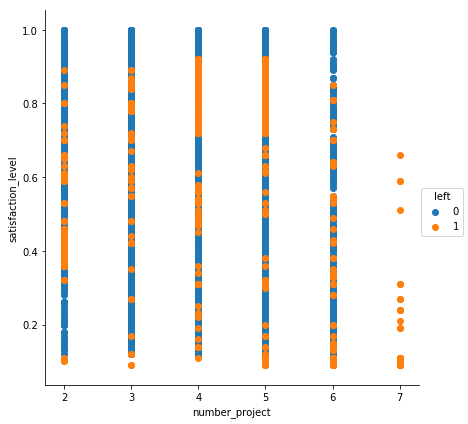

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(total_train, hue="left", size=6) \
   .map(plt.scatter, "number_project", "satisfaction_level") \
   .add_legend()
plt.show()

I have taken two features like "satisfaction_level" and "number_project" checked the decision boundary.
The observation is as follows:
1. if the "number_project" == 7 then the employee will leave.
2. if "number_project"==4,5 and (0.7 <= "satisfaction_level" <= 0.9) then the employee will leave


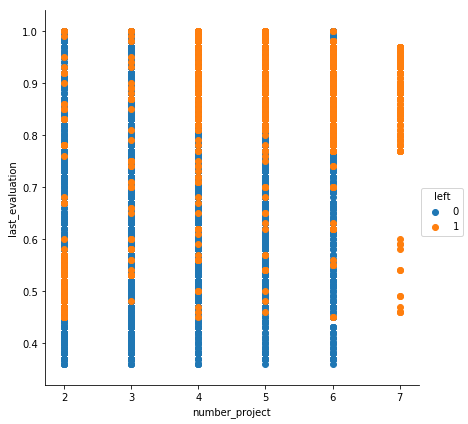

In [46]:
sns.FacetGrid(total_train, hue="left", size=6) \
   .map(plt.scatter, "number_project", "last_evaluation") \
   .add_legend()
plt.show()

***** 
Here the decision boundary is more clearer than the previous image.
For e.g:
1. if the "number_project" >= 4 and "last_evaluation" is >=0.8 we can clearly say that the employee will leave.
2. if "number_project"==7 then all the employees have left
3. if "number_project"==2 and (0.45 <="last_evaluation"<0.6) then the employee will leave


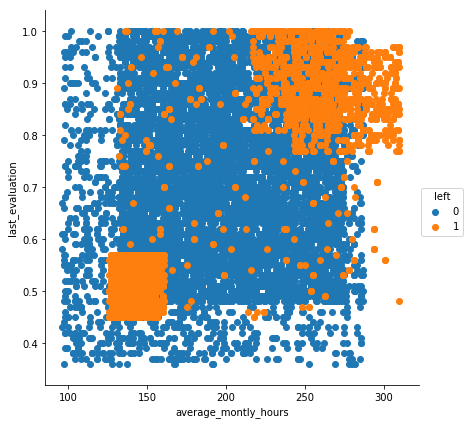

In [48]:
sns.FacetGrid(total_train, hue="left", size=6) \
   .map(plt.scatter, "average_montly_hours", "last_evaluation") \
   .add_legend()
plt.show()

This is an interesting result:
1. we can see a square box of orange dots where "average_montly_hours" ~ 150 and "last_evaluation" ~ 0.5
2. As the "average_montly_hours >= 250" and "last_evaluation >= 0.8" the orange dots are more, which indicates that the employees are leaving in such conditions

Text(0,0.5,'left')

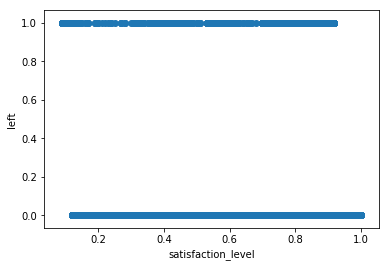

In [53]:
plt.scatter(total_train["satisfaction_level"],total_train["left"])
plt.xlabel("satisfaction_level")
plt.ylabel("left")

This shows interesting observations:
1. If the satisfaction level is greater than 0.9 then the employee will probably nopt leave
2. If the satisfaction_level is less than 0.15 then there are more left=1 so the employee more leaves

## Part-5

#### TEST ACCURACY

In [138]:
test_error=[]
depth=[]
for i in range(1,15):
    prediction = DecisionTreeClassifier(X_train,Y_train,X_test,max_depth=i,criterion="entropy")
    test_error.append(1-accuracy_score(Y_test,prediction))
    depth.append(i)

#### TRAIN ERROR

In [139]:
train_error = []
depth = []
for i in range(1,15):
    prediction_train = DecisionTreeClassifier(X_train,Y_train,X_train,max_depth=i,criterion="entropy")
    train_error.append(1-accuracy_score(Y_train,prediction_train))
    depth.append(i)

### PLOTTING TRAINING AND VALIDATION ERROR VS DEPTH

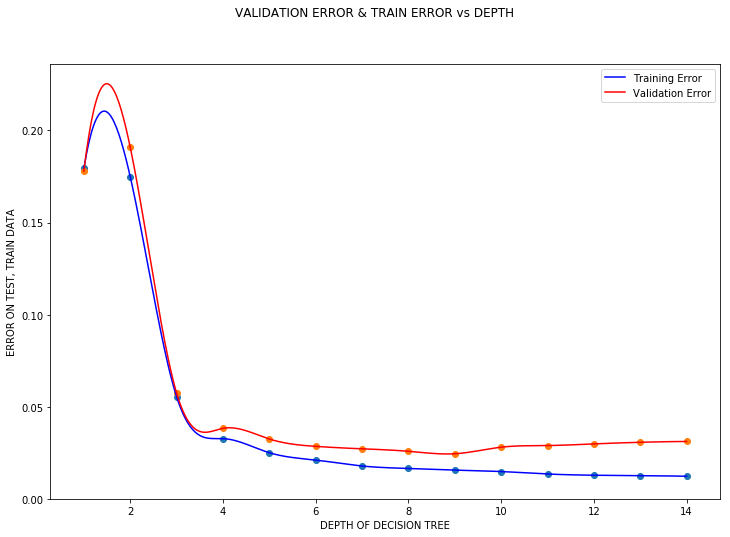

In [177]:
from scipy.interpolate import interp1d

# test_error = []
# for acc in test_accuracy:
#     test_error.append(1-acc)
fig=plt.figure(figsize=(12,8))
fig.suptitle("VALIDATION ERROR & TRAIN ERROR vs DEPTH")
plt.xlabel("DEPTH OF DECISION TREE")
plt.ylabel("ERROR ON TEST, TRAIN DATA")
depth_new = np.linspace(min(depth), max(depth),500)
f1 = interp1d(depth, train_error, kind='cubic')
train_error_smooth = f1(depth_new)
plt.plot(depth_new, train_error_smooth,linestyle='-', color='b',label="Training Error")
plt.scatter(depth,train_error)
f2 = interp1d(depth,test_error,kind='cubic')
test_error_new = f2(depth_new)
plt.plot(depth_new, test_error_new, linestyle='-', color='r',label="Validation Error",)
plt.scatter(depth,test_error)

plt.legend()
plt.show()

**HOW TRAIN ERROR AND VALIDATION ERROR WITH RESPECT TO DEPTH OF DECISION TREE INDICATES OVERFITTING AND UNDERFITTING**
*FROM THE ABOVE PLOT HERE ARE SOME OF THE FACTS:*
1. *AS THE DEPTH INCREASES THE TRAINING ERROR REDUCES MONOTONICALLY.*
2. *AS THE DEPTH INCREASES THE VALIDATION ERROR REDUCES TILL DEPTH 9 BUT AFTER THAT VALIDATION ERROR HAS INCREASED.*
**CONCLUSION: **
IF THE DEPTH INCREASES THE TRAINING ERROR WILL DECREASE MONOTONICALLY BUT THE VALIDATION ERROR WILL INCREASE AFTER A PARTICULAR DEPTH.
SO WE CAN CONCLUDE THAT TOO MUCH DEPTH OF THE TREE WILL OVERFIT, AND TOO LESS WILL UNDERFIT.
SO THE DEPTH IS THE HYPERPARAMETER OF THE DECISION TREE

#### TRAINING AND VALIDATION ERROR WITH RESPECT TO NUMBER OF NODES

As my decision tree does a binary split the number of nodes is (2^d -1), where d is the depth of the tree

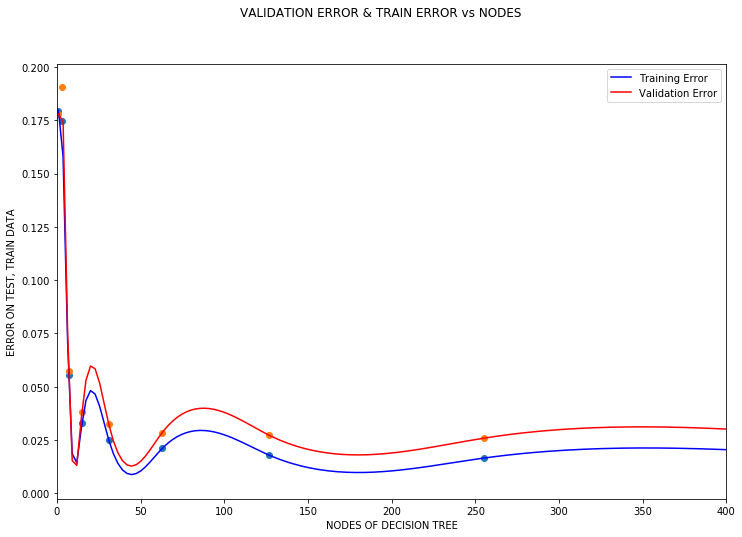

In [209]:
import math
nodes = []
for i in depth:
    nodes.append(math.pow(2,i)-1)
from scipy.interpolate import interp1d
fig=plt.figure(figsize=(12,8))
fig.suptitle("VALIDATION ERROR & TRAIN ERROR vs NODES")
plt.xlabel("NODES OF DECISION TREE")
plt.ylabel("ERROR ON TEST, TRAIN DATA")
nodes_new = np.linspace(min(nodes), max(nodes),6000)
f1 = interp1d(nodes, train_error, kind='cubic')
train_error_smooth = f1(nodes_new)
plt.plot(nodes_new, train_error_smooth,linestyle='-', color='b',label="Training Error")
plt.scatter(nodes,train_error)
f2 = interp1d(nodes,test_error,kind='cubic')
test_error_new = f2(nodes_new)
plt.plot(nodes_new, test_error_new, linestyle='-', color='r',label="Validation Error")
plt.scatter(nodes,test_error)
plt.xlim(0,400)

plt.legend()
plt.show()

AS THE NUMBER OF NODES IN EXPONENTIAL, THE PLOT STARTS NOISY BUT LATER ON IT RESEMBLES PROPER RATE

## PART-6

** HOW DECISION TREE IS SUITABLE FOR HANDLING MISSING ATTRIBUTE VALUES IN TEST DATA.**


MISSING VALUES IN ATTRIBUTES CAN BE HANDLED BY FEW WAYS IN THE DECISION TREE:
1. GIVE A CATEGORY "UNKNOWN" TO THE TREE AND IT WILL CLASSIFY IT ACCORDINGLY.
2. IF THE ATTRIBUTE IS NUMERICAL, ONE WAY IS TO GIVE MEDIAN VALUE IN THE MISSING FIELD.
3. CHECK THE DISTRIBUTION THAT THE ATTRIBUTE FOLLOW AND PROVIDE AND APPROX PREDICTIVE VALUE IN THAT MISSING PLACE(IMPUTATION).
4. THE DISTRIBUTION OF POSSIBLE MISSING VALUE IS ESTIMATED AND CORRESPONDING MODEL PREDICTIONS ARE COMBINED PROBABILISTICALLY. AT THE TIME OF TESTING, A TESTINSTANCE WITH MISSING VALUE IS SPLIT INTO BRANCHES ACCORDING TO PORTIONS OF TRAINING EXAMPLES FALLING INTO THOSE BRANCHES AND GOES DOWN TO LEAVES.
 


                                                                                                    Thank you,
                                                                                                   -Souparna Das